# Project: Investigate a Dataset (TMDB-Movies Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Note**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

The [link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&source=editors&ust=1654123023079260&usg=AOvVaw1et0LEq8dQpl_XnX3dMEVJ) to download the dataset

## Questions

The following are the questions that needs answers;
#### Research Question 1 (Which genres are most popular from year to year?!)
#### Research Question 2 (Will the most popular genres make the highest revenue?)
#### Research Question 3 (Which Genre of movies has the highest budget?)
#### Research Question 4 (Are longer movies more popular than shorter movies?)
#### Research Question 5 (Actors that have acted in most movies)
#### Research Question 6 (Top 10 movies by average votes)
#### Research Question 7 (Top 10 movies based on popularity)
#### Research Question 8 (Top 10 Directors by Average Votes)
#### Research Question 9 (The top 10 directors by  popularity)
#### Request Question 10 (Which months release the highest number of movies from 1960 to 2015?)

<a id='wrangling'></a>
## Data Wrangling

> **Note**: This section of the report includes; load in the data, check for cleanliness, and then trim and cleaning of the dataset for analysis.
### General Properties

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
mv_data = pd.read_csv(r'tmdb-movies.csv')

In [3]:
mv_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
mv_data.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
#number of samples of the movies
mv_data.shape

(10866, 21)

In [6]:
mv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (Duplicates, Missing values, Outliers Treatment!)

In [7]:
#checking for duplicates
mv_data.duplicated().sum()

1

### Drop duplicates

In [8]:
#drop duplicates
mv_data.drop_duplicates(inplace=True)

In [9]:
#check for duplicates to confirm
print(mv_data.duplicated().sum())

0


In [10]:
#check for missing values
mv_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#Check for number of unique values
mv_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
mv_data.nunique().sum()

119205

### Drop columns that won't be used

In [13]:
# drop less important columns 
mv_data.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

#confirm changes
mv_data.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [14]:
#Check for samples again
mv_data.shape

(10865, 15)

### Drop missing values

In [15]:
#drop missing values
mv_data.dropna(inplace=True)

In [16]:
#reconfirm missing values
mv_data.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
mv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
 13  budget_adj            9772 non-null   float64
 14  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64

### Drop observations that contains 0s

In [18]:
'''data_with_zeros = mv_data[(mv_data.revenue_adj == 0)|(mv_data.budget_adj == 0)|(mv_data.runtime == 0)]
mv_data.drop(data_with_zeros.index,inplace=True)
mv_data.head()'''

'data_with_zeros = mv_data[(mv_data.revenue_adj == 0)|(mv_data.budget_adj == 0)|(mv_data.runtime == 0)]\nmv_data.drop(data_with_zeros.index,inplace=True)\nmv_data.head()'

If the above codes are applied, our observations would reduce drastically to about 3000, which is very poor for generalization.

### Cast, Genres and Production companies needs seperation

In [19]:
#To check how each cast would be sepearted
mv_data.iloc[0, 4], mv_data.iloc[1, 4], mv_data.iloc[-2, 4], mv_data.iloc[-1, 4]

("Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
 'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson')

In [20]:
# Columns like cast, genres and production companies contain several values contained in a single cell separated by the "|" ,
# so we need to separate these values to make a more appropriate analysis.
def seprate_values(col):
    new_cols=(mv_data[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [21]:
mv_gen = seprate_values('genres')
mv_cast = seprate_values('cast')
mv_p_companies = seprate_values('production_companies')

In [22]:
mv_data['cast'],mv_data['genres'],mv_data['production_companies']=mv_cast['cast_1'],mv_gen['genres_1'],mv_p_companies['production_companies_1']

In [23]:
#checking the counts of the top 10 different genres, cast and production companies
display(mv_data.genres.value_counts().nlargest(10))

Drama          2223
Comedy         2084
Action         1479
Horror          853
Adventure       550
Thriller        474
Crime           361
Animation       346
Documentary     264
Fantasy         253
Name: genres, dtype: int64

In [24]:
#checking the counts of the top 10 different cast
display(mv_data.cast.value_counts().nlargest(10))

Nicolas Cage          50
Robert De Niro        42
Bruce Willis          39
Clint Eastwood        38
Tom Hanks             37
Johnny Depp           37
Sylvester Stallone    36
Denzel Washington     33
Robin Williams        33
John Travolta         33
Name: cast, dtype: int64

In [25]:
#checking the counts of the top 10 different cast
display(mv_data.production_companies.value_counts().nlargest(10))

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
New Line Cinema                           206
Warner Bros.                              172
Miramax Films                             132
TriStar Pictures                          121
Columbia Pictures Corporation             119
Name: production_companies, dtype: int64

In [26]:
#check for the unique genres
mv_data['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [27]:
#check for the unique cast 
mv_data.cast.unique()

array(['Chris Pratt', 'Tom Hardy', 'Shailene Woodley', ...,
       'Innokentiy Smoktunovskiy', 'Tatsuya Mihashi', 'Harold P. Warren'],
      dtype=object)

In [28]:
#check for the unique production companies
mv_data.production_companies.unique()

array(['Universal Studios', 'Village Roadshow Pictures',
       'Summit Entertainment', ..., 'Bruce Brown Films',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

## Correlation Map

It shows how correlated most of the features are. However, runtime, vote average and release year shows a very poor correlation across other features. Further Exploratory Data Analysis (EDA) would show the correaltion of some of the features.

<AxesSubplot:>

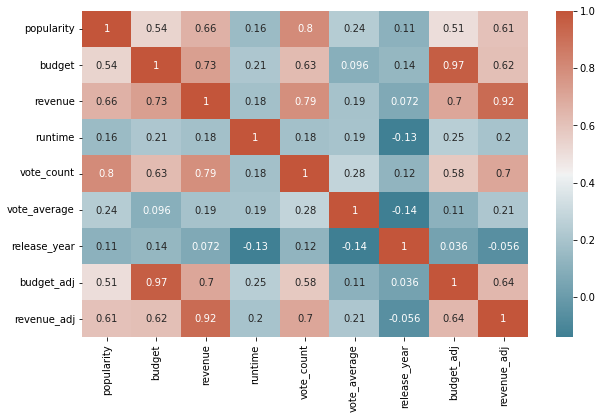

In [29]:
# calculate correlation matrix
corr = mv_data.corr()
#plot heat map
plt.figure(figsize = (10,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [30]:
#check for the statistical description of the dataset
mv_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
mv_data.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
mv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
 13  budget_adj            9772 non-null   float64
 14  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64

### Change release date to datetime 

In [33]:
mv_data.release_date = pd.to_datetime(mv_data.release_date)

In [34]:
mv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   runtime               9772 non-null   int64         
 7   genres                9772 non-null   object        
 8   production_companies  9772 non-null   object        
 9   release_date          9772 non-null   datetime64[ns]
 10  vote_count            9772 non-null   int64         
 11  vote_average          9772 non-null   float64       
 12  release_year          9772 non-null   int64         
 13  budget_adj       

#### Storing the new cleaned dataset

In [35]:
mv_data.to_csv('master_TMDB_Movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Note**: Now that the dataset have been trimmed and cleaned your data, we have to move on to exploration. The goal is to compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section.

### Research Question 1 (Which genres are most popular from year to year?!)

In [36]:
mv_genre = mv_data[['popularity', 'genres', 'release_year']]
mv_genre.head()

,popularity,genres,release_year
0,32.985763,Action,2015
1,28.419936,Action,2015
2,13.112507,Adventure,2015
3,11.173104,Action,2015
4,9.335014,Action,2015


In [37]:
# groupby genres and release year to get the popularity
top_genres = mv_data.groupby(['release_year', 'genres'])[['popularity']].mean()
top_genres.head()

popularity
release_year genres               
1960         Action       0.590724
             Adventure    0.304992
             Comedy       0.392067
             Crime        0.269428
             Drama        0.687575

Creating a dataframe that will only pick the most popular movie based on each year from 1960 to 2015

In [38]:
# dataframe to pick the most popular genre in each
mv_genre_yearbased = top_genres.groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [39]:
mv_genre_yearbased.head()

,,,popularity
release_year,release_year,genres,
1960,1960,Drama,0.687575
1961,1961,Adventure,1.394596
1962,1962,Adventure,1.283631
1963,1963,Animation,2.180410
1964,1964,Adventure,0.736431


In [40]:
# Reset the index 
mv_genre_yearbased.reset_index(level = 2, inplace = True)

In [41]:
mv_genre_yearbased.head(2)

,,genres,popularity
release_year,release_year,,
1960,1960,Drama,0.687575
1961,1961,Adventure,1.394596


In [42]:
mv_genre_yearbased.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [43]:
# which genre is the most popular through the years
popular_genre = mv_genre_yearbased.genres.value_counts()
popular_genre

Adventure          19
Animation           8
Science Fiction     7
Romance             4
Drama               3
Family              3
Fantasy             3
History             2
Music               2
Crime               1
Horror              1
Thriller            1
Mystery             1
Western             1
Name: genres, dtype: int64

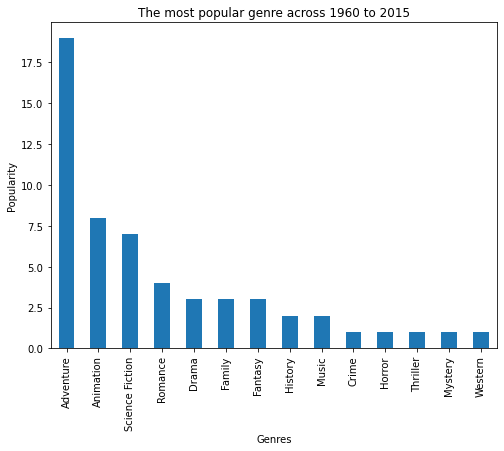

In [44]:
# Let's plot the most popular movies
plt.figure(figsize=(8,6))
popular_genre.plot.bar(title='The most popular genre across 1960 to 2015', xlabel='Genres', ylabel='Popularity');

**Results:**

- **Adventure** kind of movies are the most popular; this could be a suggestion that a genre to consider for any production companies to gain high popularity could be **Adventure**, then followed by **Animation** and **Fantasy**.

- Lets see if the kinds of Genres with highest budget and revenue to have a better insight into the kind of genres. 

- Top 5 popular genres are *Adventure*, *Animation*, *Science Fiction*, *Romance*, and *Drama*

### Research Question 2 (Will the most popular genres make the highest revenue?)

In [45]:
# grouby genre and get the revenue
mv_genre_rev = mv_data.groupby('genres').revenue.mean()
mv_genre_revbased = mv_genre_rev.to_frame().groupby(level='genres').revenue.nlargest().to_frame()

In [46]:
mv_genre_revbased.head(20)

,,revenue
genres,genres,
Action,Action,6.523815e+07
Adventure,Adventure,1.328017e+08
Animation,Animation,8.308845e+07
Comedy,Comedy,3.257873e+07
Crime,Crime,3.519547e+07
Documentary,Documentary,3.015843e+06
Drama,Drama,2.770208e+07
Family,Family,6.917541e+07
Fantasy,Fantasy,7.232828e+07


In [47]:
mv_genre_revbased.reset_index(level=1,inplace=True)

In [48]:
mv_genre_revbased.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Action to Western
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genres   20 non-null     object 
 1   revenue  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [49]:
mv_genre_sortedrev = mv_genre_revbased.sort_values('revenue', ascending=False)

<Figure size 1440x1440 with 0 Axes>

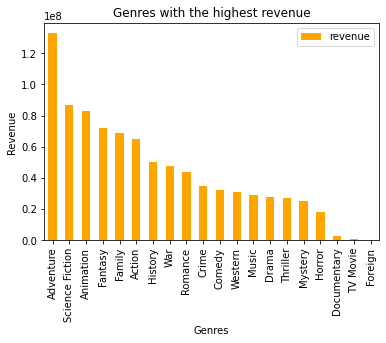

In [50]:
plt.figure(figsize=(20,20))
mv_genre_sortedrev.plot.bar(color='orange', title='Genres with the highest revenue', xlabel='Genres', ylabel='Revenue');

**Results:**

- Top 5 genre with the highest revenue are, *Adventue*, *Science Fiction*, *Animation*, *Fantasy* and *Family*.
- **Adventure** has proven to be a must considered genre when making a movie, as it has shown to be the most popular and also makes the highest revenue of over **132 million**. 
- **Science Fiction** which is 3rd most popular movie came 2nd in revenue can also be considered with over **86 million**. 
- Third is **Animation** which also came 2nd in popularity should be considered with over **83 million**


**However, the following should then be noted for better consideration:**
- 4th and 5th, **Fantasy** and **Family** with over **72 million** and **69 miilion** revenue respectively were not among the top 5 popular genres.
- **Romance** and **Drama** being the 4th and 5th most popular movies made low revenues compare to the top 5 genres with the highest revenue, they made **43 miilion** and **27 million** respectively.

### Research Question 3 (Which Genre of movies has the highest budget?)

In [51]:
mv_budget = mv_data.groupby('genres').budget.mean().sort_values(ascending=False)

In [52]:
mv_budget.head(20)

genres
Adventure          4.280888e+07
Science Fiction    2.741735e+07
Action             2.635181e+07
Fantasy            2.513934e+07
Animation          2.491614e+07
War                2.363526e+07
Family             2.060850e+07
Western            1.951699e+07
History            1.797741e+07
Crime              1.408917e+07
Music              1.331899e+07
Romance            1.269258e+07
Thriller           1.261130e+07
Comedy             1.148367e+07
Drama              1.130736e+07
Mystery            1.045162e+07
Horror             5.968360e+06
Documentary        5.903649e+05
TV Movie           3.305085e+05
Foreign            0.000000e+00
Name: budget, dtype: float64

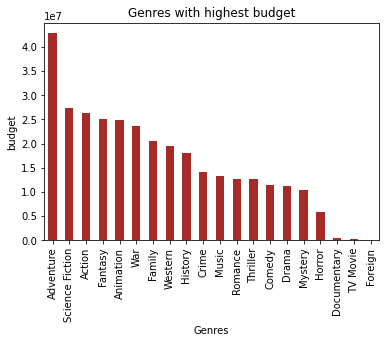

In [53]:
mv_budget.plot.bar(color='brown', title='Genres with highest budget', xlabel='Genres', ylabel='budget');

**Results:**

- **Adventure** made over **90 million** profit compare to other genres

- **Science Fiction** and **Animation** both made over **59 million** profit.

- **Fantasy** and **Family** made over **47 million** and **49 miilion** respectively

- **Action** with 6th highest revenue made over **39 million**

### Research Question 4 (Are longer movies more popular than shorter movies?)
(Considering only the last decade, 2010 to 2015)

In [54]:
last_decade = [2010,2011,2012,2013,2014,2015]

In [55]:
## running time bins
mv_copy = mv_data[mv_data.release_year.isin (last_decade)].copy()

In [56]:
mv_copy.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
##source of quantilecut code https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092
def cut_into_quantile(dfname,column_name):
    """
        cut_into_quantile takes data frame and column name as param.
        returns the dataframe with an additional column "columnname_levels" and divide it into 4 quantiles.
    """
    ## find quartile,max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    ## bin edges that will be used to cut data in groups
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    ## labels for the four budget level groups
    bin_names = ['Low','Medium','Moderately High','High']
    ## Create budget levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [58]:
mv_copy = mv_copy[mv_copy['runtime'] != 877]
mv_bins_runtime = cut_into_quantile(mv_copy, 'runtime')

In [59]:
mv_bins_runtime.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High


In [60]:
run_popularity = mv_bins_runtime.groupby(['release_year','runtime_levels']).popularity.median().to_frame()
run_popularity.reset_index(inplace=True)

In [61]:
run_popularity.head()

,release_year,runtime_levels,popularity
0,2010,Low,0.363958
1,2010,Medium,0.339990
2,2010,Moderately High,0.616430
3,2010,High,0.739880
4,2011,Low,0.378240


In [62]:
# creating a list for the long, mid-long, medium and short runtime
long_movie = run_popularity[run_popularity['runtime_levels'] == 'High'].popularity.tolist()
mid_long_movie = run_popularity[run_popularity['runtime_levels'] == 'Moderately High'].popularity.tolist()
medium_movie = run_popularity[run_popularity['runtime_levels'] == 'Medium'].popularity.tolist()
short_movie = run_popularity[run_popularity['runtime_levels'] == 'Low'].popularity.tolist()

In [63]:
long_movie

[0.73988,
 0.6703234999999995,
 0.631569,
 0.864696999999999,
 0.7185629999999995,
 1.068202]

Text(0, 0.5, 'Popularity')

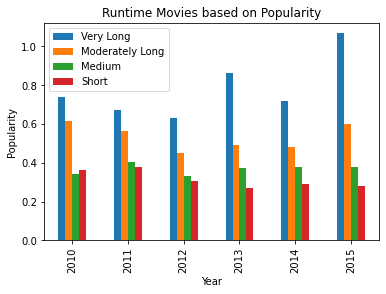

In [64]:
# let's create the dataFrame and visual
dataplot = pd.DataFrame({
    'Very Long': long_movie,
    'Moderately Long': mid_long_movie,
    'Medium': medium_movie,
    'Short': short_movie}, index=last_decade)

dataplot.plot(kind='bar')
plt.title('Runtime Movies based on Popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')

**Results:**

At begining of the decade, 2010, short movie tend to be more popular than medium movies. However, as years goes by, the longer the movie, the higher the popularity.

### Research Question 5 (Actors that have acted in most movies)

In [65]:
mv_data.cast.value_counts()

Nicolas Cage         50
Robert De Niro       42
Bruce Willis         39
Clint Eastwood       38
Tom Hanks            37
                     ..
Dennis Bateman        1
Dave Annable          1
Zana MarjanoviÄ‡      1
Dee Bradley Baker     1
Harold P. Warren      1
Name: cast, Length: 3798, dtype: int64

Text(0, 0.5, 'Number of Movies')

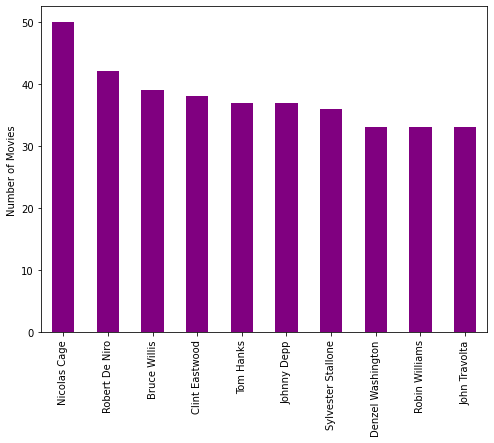

In [66]:
mv_data['cast'].value_counts()[:10].sort_values(ascending = False).plot(kind='bar', figsize=(8,6), color='purple')
plt.ylabel('Number of Movies')

### Result:

**Nicolas Cage** has featured in more movies than the rest, followed by **Robert De Niro** and **Bruce Willis**, being the top 3 actors with most movie appearance

### Research Question 6 (Top 10 movies by average votes)

In [67]:
top_10_movies_by_vote = mv_data.sort_values(by = ['vote_average'],ascending = False)[['original_title','vote_average']].head(10)
top_10_movies_by_vote.reset_index(drop=True,inplace=True)
top_10_movies_by_vote.set_index('original_title',inplace=True)
top_10_movies_by_vote

,vote_average
original_title,
Pink Floyd: Pulse,8.7
Queen - Rock Montreal,8.5
A Personal Journey with Martin Scorsese Through American Movies,8.5
The Art of Flight,8.5
"Guten Tag, RamÃ³n",8.4
The Jinx: The Life and Deaths of Robert Durst,8.4
Stop Making Sense,8.4
The Shawshank Redemption,8.4
The Century of the Self,8.3


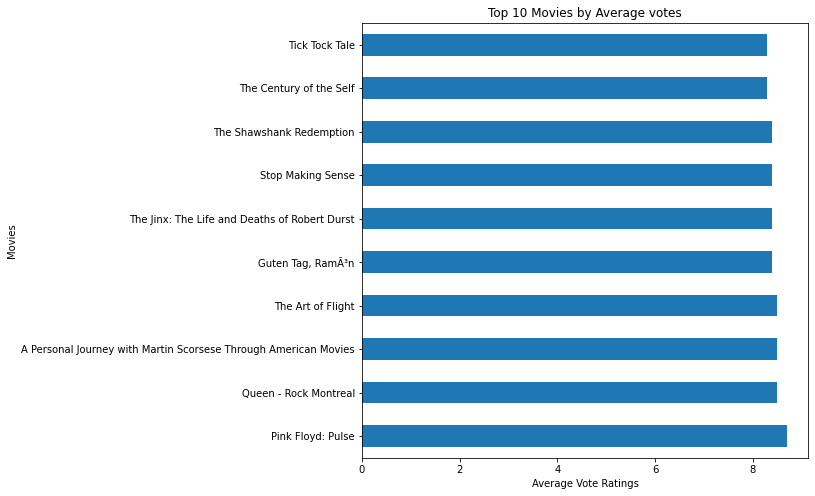

In [68]:
top_10_movies_by_vote.vote_average.plot(kind='barh', figsize=(8, 8))
plt.title('Top 10 Movies by Average votes')
plt.ylabel('Movies')
plt.xlabel('Average Vote Ratings');

**Result:**

- Top 3 movie titles are *Pink Floyd: Pulse*, *Queen - Rock Montreal* and *A Personal Journey with Martin Scorses Through American Movies*

### Research Question 7 (Top 10 movies based on popularity)

In [69]:
top_movie_by_pop = mv_data.sort_values(by = ['popularity'],ascending = False)[['original_title','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True,inplace=True)
top_movie_by_pop.set_index('original_title',inplace=True)
top_movie_by_pop

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


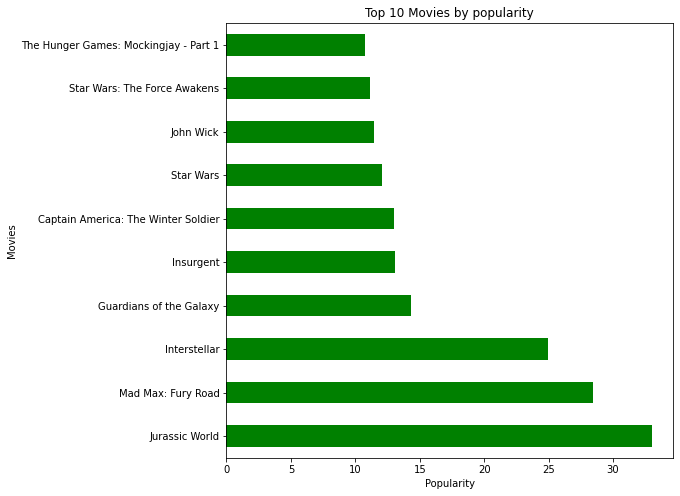

In [70]:
top_movie_by_pop.popularity.plot(kind='barh', figsize=(8,8), color='green')
plt.title('Top 10 Movies by popularity')
plt.ylabel('Movies')
plt.xlabel('Popularity');

**Results:**

- The top 3 movies are *Jurassic World*, *Mad Max: Fury Road* and *Interstellar*

### Research Question 8 (Top 10 Directors by Average Votes)

In [71]:
### Top 10 Directors by average vote Ratings
mv_data.director = mv_data.director.str.split('|')
mv_data =mv_data.explode('director')
mv_data

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner,John Frankenheimer,176,Action,Cherokee Productions,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy,Eldar Ryazanov,94,Mystery,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi,Woody Allen,80,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [72]:
top_10_dir_rat = mv_data.groupby('director')[['vote_average']].mean().sort_values(ascending=False, by=['vote_average']).head(10)
top_10_dir_rat

,vote_average
director,
David Mallet,8.7
Saul Swimmer,8.5
Curt Morgan,8.5
Michael Henry Wilson,8.5
Jorge RamÃ­rez SuÃ¡rez,8.4
Dean Wellins,8.3
Claude Lanzmann,8.3
Adam Curtis,8.3
Damien Chazelle,8.2


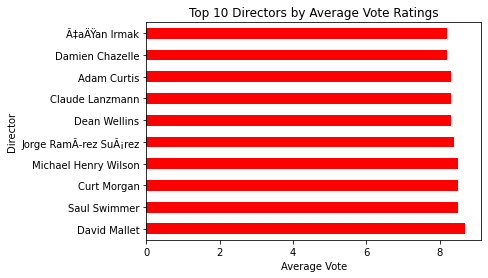

In [73]:
top_10_dir_rat.vote_average.plot(kind='barh', color='red')
plt.title("Top 10 Directors by Average Vote Ratings")
plt.xlabel("Average Vote")
plt.ylabel("Director");

In [74]:
mv_data[mv_data.director == 'David Mallet']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6911,0.21201,0,0,Pink Floyd: Pulse,David Gilmour,David Mallet,145,Music,SMV Enterprises,2006-07-09,23,8.7,2006,0.0,0.0


**Results:**

- **David Muller** is the director with the highest average vote, which can be attributed to the movie (Pink Floyd: Pulse) with highest average vote also. 
- The other 2 that make the top 3 are **Saul Swimmer** and **Curt Morgan**

### Research Question 9 (The top 10 directors by  popularity)


In [75]:
top_10_dir_pop = mv_data.groupby('director')[['popularity']].mean().sort_values(ascending=False, by=['popularity']).head(10)
top_10_dir_pop

,popularity
director,
Colin Trevorrow,16.696886
David Leitch,11.422751
Chad Stahelski,11.422751
Alan Taylor,6.883129
Christopher Nolan,6.865185
Alex Garland,6.118847
Patrick Tatopoulos,5.806897
Wes Ball,5.553082
Dan Gilroy,5.522641


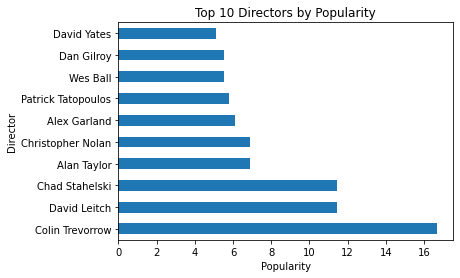

In [76]:
top_10_dir_pop.popularity.plot(kind='barh')
plt.title("Top 10 Directors by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Director");

**Results:**

- Colin Trevorrow is the most popular director, the director of Jurassic World. The other 2 that makes the top 3 are, **David Leitch** and **Chad Stahelski**

### Request Question 10 (Which months release the highest number of movies from 1960 to 2015?)

In [77]:
no_of_release=mv_data['release_date'].dt.month.value_counts().sort_index()
no_of_release

1      809
2      676
3      802
4      780
5      835
6      877
7      781
8      898
9     1309
10    1159
11     798
12     984
Name: release_date, dtype: int64

In [78]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
no_of_release = pd.DataFrame(no_of_release)
no_of_release['month'] = months

In [79]:
no_of_release

,release_date,month
1,809,Jan
2,676,Feb
3,802,Mar
4,780,Apr
5,835,May
6,877,Jun
7,781,Jul
8,898,Aug
9,1309,Sep
10,1159,Oct


In [80]:
#change the column name of the new dataframe 'number_of_release'
no_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

Text(0, 0.5, 'Number of movie releases')

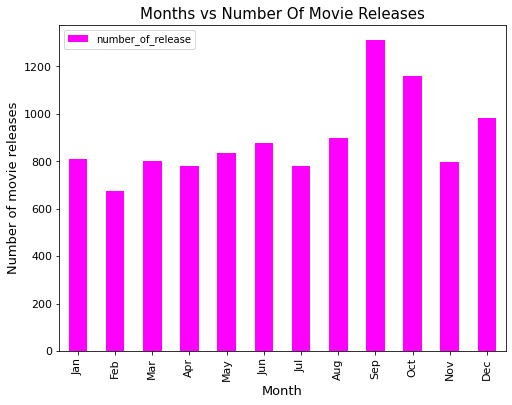

In [81]:
no_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6), color='magenta')
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

**Results:**

- **September** is the month with the highest release, and **October** is the month with 2nd highest release.

- Then we can deduce that, movies are released most in the 3rd quarter of the year.

<a id='conclusions'></a>
## Conclusions


**Results**: Our data suggest that
> 1. Adventure have shown to be the best genre to invest in, as it has the highest popularity, and highest profit. Although, it has the highest budget, however, the profit margin was higher than the other movies.
> 2. Other 2 genres that could be considered are Animation and Science Fiction. 
> 3. The worse set of genre to be considered are Foreign, TV Movie, Documentary and Horror.  
> 4. The last quarter of the year have also shown to be months with highest release of movies.
>5. The longer the movie the higher the popularity.
>6. Other insights that could be gotten are;
    - The top 5 actors with most movies appearance are Nicolas Cage, Robert De Niro, Bruce Willis, Clint Eastwood and Tom Hanks 
    -  Colin Trevorrow, David Leitch and Chad Stahelski are the top 3 most popular directors, that produced Jurassic World, Mad Max: Fury Road and Interstellar respectfully.
    - David Mallet, Saul Swimmer and Curt Morgan are the top 3 directors by average votings, that produced Pink Floyd: Pulse, Queen - Rock Montreal and A Personal Journey with Martin Scorsese Through American Movies respectfully.
 
**Limitations**: There are a couple of limitations with our data:
> 1. '0' showing could be a missing value which need further attention and analysis. Dropping it would lead to huge data loss.
> 2. No positive correlation between budget and revenue
> 3. The dataset is highly skewed which resulted in very high outliers that need treatment for a better generalization and analysis. 
>4. 44 movie directors were missing which is not included in our analysis. 